In [2]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

In [135]:
prices_news_merged_df = pd.read_csv('prices_news_merged_df.csv', sep=';')

In [136]:
prices_news_merged_df.columns

Index(['Date', 'OPEN', 'CLOSE', 'MIN', 'MAX', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       'date'],
      dtype='object')

In [137]:
print(prices_news_merged_df.columns)
price_cols = ['OPEN', 'CLOSE', 'MIN', 'MAX']
news_cols = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]

Index(['Date', 'OPEN', 'CLOSE', 'MIN', 'MAX', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       'date'],
      dtype='object')


In [138]:
price_change_cols = []
for i in range(1, 30):
    new_col_name = "price_change_" + str(i)
    prices_news_merged_df[new_col_name] = (prices_news_merged_df['CLOSE'] - prices_news_merged_df['CLOSE'].shift(periods=i)) / prices_news_merged_df['CLOSE'].shift(periods=i) 
    price_change_cols.append(new_col_name)

In [310]:
for i in range (-5, 0):
    new_col_name = 'y_' + str(-i)
    prices_news_merged_df[new_col_name] = (prices_news_merged_df['CLOSE'].shift(periods=i) - prices_news_merged_df['CLOSE'])   / prices_news_merged_df['CLOSE']

prices_news_merged_df.tail(6)

,index,Date,OPEN,CLOSE,MIN,MAX,0,1,2,3,...,price_change_25,price_change_26,price_change_27,price_change_28,price_change_29,y_5,y_4,y_3,y_2,y_1
683,712,2020-12-23,118.274747,119.126325,118.156472,120.532016,9,13,13,10,...,0.011724,0.017450,0.004303,-0.009554,-0.025479,-0.011814,-0.001074,-0.012316,-0.004306,-0.001102
684,713,2020-12-24,119.233539,118.995072,118.055010,120.342411,6,12,10,8,...,0.020101,0.010609,0.016329,0.003197,-0.010645,NaN,-0.010724,0.000028,-0.011227,-0.003208
685,714,2020-12-25,118.423895,118.613373,116.896227,119.028520,9,5,8,9,...,0.029989,0.016829,0.007368,0.013069,-0.000021,NaN,NaN,-0.007541,0.003246,-0.008045
686,715,2020-12-26,119.064104,117.659148,116.047217,119.778489,6,7,11,4,...,0.034323,0.021703,0.008649,-0.000737,0.004919,NaN,NaN,NaN,0.000508,0.011382
687,716,2020-12-27,117.494425,118.998354,116.554470,120.021739,13,9,11,11,...,0.043602,0.046096,0.033332,0.020129,0.010637,NaN,NaN,NaN,NaN,-0.010751
688,717,2020-12-28,119.426748,117.718945,117.507051,120.788213,5,4,6,2,...,0.049558,0.032382,0.034848,0.022222,0.009161,NaN,NaN,NaN,NaN,NaN


In [311]:
prices_news_merged_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
prices_news_merged_df = prices_news_merged_df.reset_index()

In [312]:
prices_news_merged_df[price_change_cols].tail(2)

,price_change_1,price_change_2,price_change_3,price_change_4,price_change_5,price_change_6,price_change_7,price_change_8,price_change_9,price_change_10,...,price_change_20,price_change_21,price_change_22,price_change_23,price_change_24,price_change_25,price_change_26,price_change_27,price_change_28,price_change_29
682,-0.014875,-0.023755,-0.010051,-0.003141,0.002548,-0.003260,0.004929,0.018933,0.030323,0.033516,...,0.033535,0.036005,0.023364,0.010289,0.000888,0.006553,-0.006453,-0.020161,-0.035916,-0.032056
683,0.010826,-0.004210,-0.013186,0.000666,0.007651,0.013401,0.007531,0.015808,0.029964,0.041477,...,0.062106,0.044724,0.047220,0.034443,0.021226,0.011724,0.017450,0.004303,-0.009554,-0.025479


# Train test split

In [392]:
X = np.array(prices_news_merged_df[news_cols + price_change_cols].values.tolist())
y = np.array(prices_news_merged_df[['y_5']].values.tolist())

In [389]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # To get the indices 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(len(X_train), len(X_test))

570 114


# Model evaluation function

In [449]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics 

def eval_model_predictions_regression_problem(y_train, train_pred, y_test, test_pred, need_plots=True):
    # Error
    error_train = train_pred - y_train
    error_test = test_pred - y_test
    
    # Bias
    bias_train = error_train.mean()
    bias_test = error_test.mean()
    
    # MAE
    mae_train = mean_absolute_error(y_train, train_pred)
    mae_test = mean_absolute_error(y_test, test_pred)
    
    # RMSE 
    rmse_train = math.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = math.sqrt(mean_squared_error(y_test, test_pred))
    
    # Compare error with data
    comparing_metrics = pd.DataFrame(columns=['name', 'value'])
    
    comparing_metrics = comparing_metrics.append(
        {'name': 'mae_train', 'value': mae_train}, ignore_index=True)
        
    comparing_metrics = comparing_metrics.append(
        {'name': 'mae_test', 'value': mae_test}, ignore_index=True)
    
    if type(y_train[0]) == np.ndarray:
        st_dev = statistics.stdev([item for sublist in y_train for item in sublist])
    else:
        st_dev = statistics.stdev(y_train)
    comparing_metrics = comparing_metrics.append(
        {
            'name': 'train_st_dev', 
            'value': st_dev
        }, ignore_index=True)
        
    comparing_metrics = comparing_metrics.append(
        {
            'name': 'train_q75_minus_q25', 
            'value': np.quantile(a=error_train, q=0.75) - np.quantile(a=error_train, q=0.25)
        }, ignore_index=True)
    
    comparing_metrics = comparing_metrics.append(
        {
            'name': 'train_q95_minus_q05', 
            'value': np.quantile(a=error_train, q=0.95) - np.quantile(a=error_train, q=0.05)
        }, ignore_index=True)
    
    comparing_metrics.index = comparing_metrics['name']
        
    if need_plots:
        
        # 
        ncols_plot = 2
        nrows_plot = 4
        
        # 
        subplot_size_width = 6
        subplot_size_height = 4
        
        # Зададим расстояние для графика в целом
        plot_size_inches_width = ncols_plot * subplot_size_width
        plot_size_inches_height = nrows_plot * subplot_size_height
        
        fig, axes = plt.subplots(nrows=nrows_plot, ncols=ncols_plot)
        fig.set_size_inches(plot_size_inches_width, plot_size_inches_height, forward=True)
        
        axes[0, 0].plot(error_train, '.')
        axes[0, 0].axhline(y=bias_train, color='green')
        axes[0, 0].set_title('error_train, ' + 'bias: ' + str(bias_train))
        
        axes[0, 1].plot(error_test, '.')
        axes[0, 1].axhline(y=bias_test, color='green')
        axes[0, 1].set_title('error_train, ' + 'bias: ' + str(bias_test))
        
        comparing_metrics.plot(kind='barh', width=0.8, ax=axes[1,0]); axes[1,0].set_title('1')
        
        plt.tight_layout()
    
    return comparing_metrics

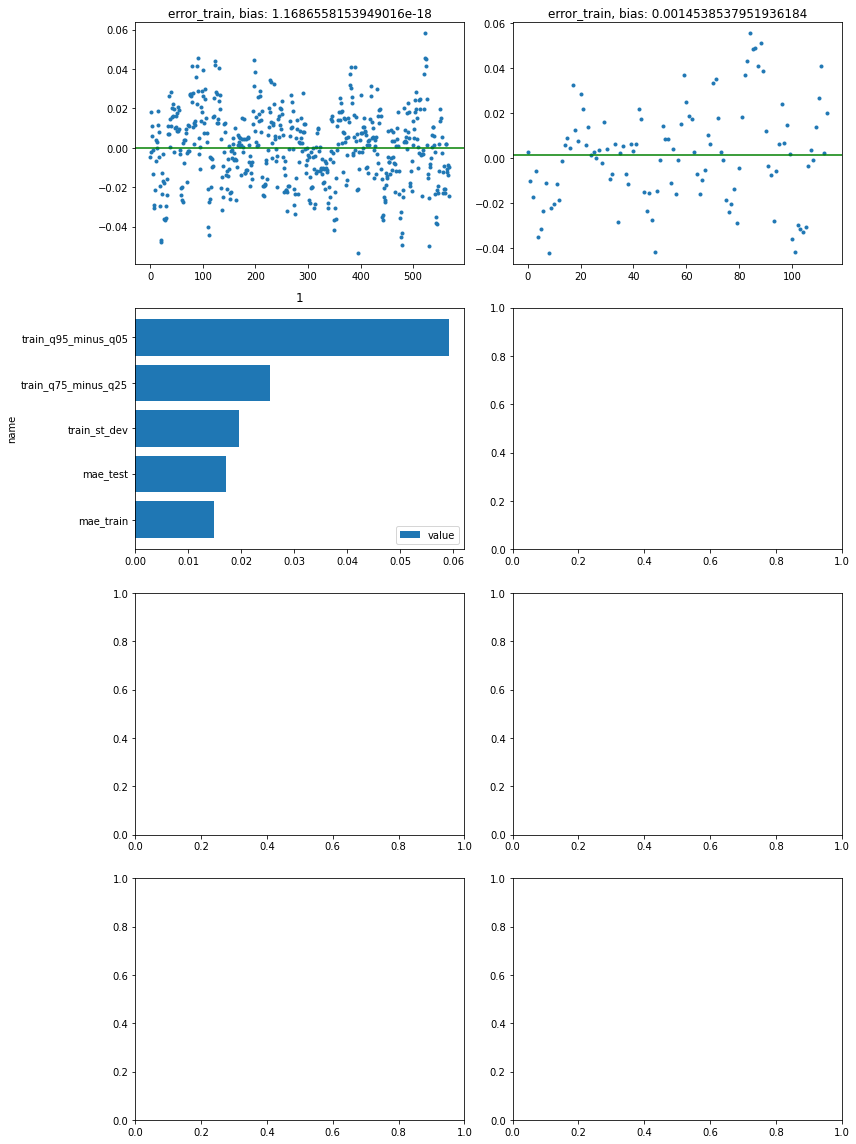

In [450]:
comparing_metrics = eval_model_predictions_regression_problem(y_train, train_pred, y_test, test_pred)

In [441]:
comparing_metrics.plot(kind='barh')

,name,value
0,train_q95_minus_q05,0.059095
1,train_q75_minus_q25,0.025404
2,train_st_dev,0.019547


In [371]:
np.quantile(a=y_train, q=0.75)

0.01594732171894139

In [405]:
type(y_train[0]) == np.ndarray

True

0.019547097596031404

# Linear Regression

In [394]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X_train, X_test
# y_train, y_test

# Train model
model_lin_reg = LinearRegression().fit(X_train, y_train)

# Make prediction on train and test
train_pred = model_lin_reg.predict(X_train)
test_pred = model_lin_reg.predict(X_test)

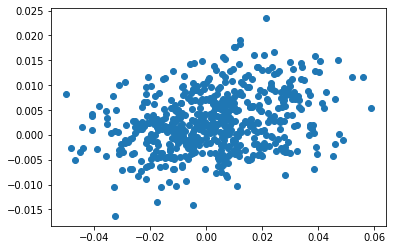

In [395]:
plt.scatter(y_train, train_pred)

# LSTM

In [180]:
import math
import torch
import torch.nn as nn

In [181]:
class NaiveCustomLSTM(nn.Module):
    def __init__(self, input_sz: int, hidden_sz: int):
        super().__init__()
        self.input_size = input_sz
        self.hidden_size = hidden_sz
        
        #i_t
        self.U_i = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_i = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_i = nn.Parameter(torch.Tensor(hidden_sz))
        
        #f_t
        self.U_f = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_f = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_f = nn.Parameter(torch.Tensor(hidden_sz))
        
        #c_t
        self.U_c = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_c = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_c = nn.Parameter(torch.Tensor(hidden_sz))
        
        #o_t
        self.U_o = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_o = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_o = nn.Parameter(torch.Tensor(hidden_sz))
        
        self.init_weights()

In [182]:
def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

In [183]:
def forward(self,
                x,
                init_states=None):
        
        """
        assumes x.shape represents (batch_size, sequence_size, input_size)
        """
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        
        if init_states is None:
            h_t, c_t = (
                torch.zeros(bs, self.hidden_size).to(x.device),
                torch.zeros(bs, self.hidden_size).to(x.device),
            )
        else:
            h_t, c_t = init_states
            
        for t in range(seq_sz):
            x_t = x[:, t, :]
            
            i_t = torch.sigmoid(x_t @ self.U_i + h_t @ self.V_i + self.b_i)
            f_t = torch.sigmoid(x_t @ self.U_f + h_t @ self.V_f + self.b_f)
            g_t = torch.tanh(x_t @ self.U_c + h_t @ self.V_c + self.b_c)
            o_t = torch.sigmoid(x_t @ self.U_o + h_t @ self.V_o + self.b_o)
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            
            hidden_seq.append(h_t.unsqueeze(0))
        
        #reshape hidden_seq p/ retornar
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [184]:
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()
                
    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
         
    def forward(self, x, 
                init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device), 
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states
         
        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            gates = x_t @ self.W + h_t @ self.U + self.bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.tanh(gates[:, HS*2:HS*3]),
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [185]:
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz, peephole=False):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.peephole = peephole
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()
                
    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
         
    def forward(self, x, 
                init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device), 
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states
         
        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            
            if self.peephole:
                gates = x_t @ U + c_t @ V + bias
            else:
                gates = x_t @ U + h_t @ V + bias
                g_t = torch.tanh(gates[:, HS*2:HS*3])
            
            i_t, f_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            
            if self.peephole:
                c_t = f_t * c_t + i_t * torch.sigmoid(x_t @ U + bias)[:, HS*2:HS*3]
                h_t = torch.tanh(o_t * c_t)
            else:
                c_t = f_t * c_t + i_t * g_t
                h_t = o_t * torch.tanh(c_t)
                
            hidden_seq.append(h_t.unsqueeze(0))
            
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        
        return hidden_seq, (h_t, c_t)

In [186]:
ds_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=128, shuffle=True)

ds_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=256, shuffle=True)

TypeError: 'int' object is not callable